# Lab 2.8: Tree Based Methods

In this case, we will be conduct a simpler exercise with decision trees using previous implementations. In particular, we will make use of several implemented methods in ML libraries s.a. `sklearn` (_that should be good news for you, doesn't it?_). With this, we will try to explore the main characteristics of decision trees, that you will also have to explore in the more theoretical part of the lab (the other exercise, the one on the pdf).

We will begin, as usual, importing the relevant libraries:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode


# ML libraries to construct, use and analyse the trees
from sklearn.tree import DecisionTreeRegressor, export_graphviz, DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from io import StringIO
from IPython.display import Image  
from sklearn.metrics import mean_squared_error, confusion_matrix
import pydotplus

from sklearn.metrics import mean_squared_error

We will first apply this to a regression dataset so that you see the way the model is constructed for this case 

## Regression Tree

For starters, let us try out a regression tree. To that end, first load the `Hitters.csv` dataset from the `data` 
folder.

In [4]:
hitters  = pd.read_csv("../data/Hitters.csv").dropna() #(make sure you remove the None values!)

# Print the columns here to check their names
print(hitters.columns)
hitters

Index(['Player', 'AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years',
       'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League',
       'Division', 'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague'],
      dtype='object')


,Player,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N
5,-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,...,501,336,194,A,W,282,421,25,750.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,-Willie McGee,497,127,7,65,48,37,5,2703,806,...,379,311,138,N,E,325,9,3,700.0,N
318,-Willie Randolph,492,136,5,76,50,94,12,5511,1511,...,897,451,875,A,E,313,381,20,875.0,A
319,-Wayne Tolleson,475,126,3,61,43,52,6,1700,433,...,217,93,146,A,W,37,113,7,385.0,A
320,-Willie Upshaw,573,144,9,85,60,78,8,3198,857,...,470,420,332,A,E,1314,131,12,960.0,A


For this first case, we will only use the variables `Years` and `Hits` for the tree. Our target variable will be `Salary`. Separate them into `X` and `y`

In [5]:
# Separate the independent variables (X) from the dependent one (y - salary)


X = hitters[['Years', 'Hits']] # Todas las columnas excepto "Salary"
y = hitters["Salary"]
X

,Years,Hits
1,14,81
2,3,130
3,11,141
4,2,87
5,11,169
...,...,...
317,5,127
318,12,136
319,6,126
320,8,144


Construct a _decision tree regressor_ using the `sklearn` function and fit it. To do that, check out the `DecisionTreeRegressor` in sklearn and implement it here.

For reproducibility, fix the `random_state` to `0` and the `max_leaf_nodes` to `3` (make sure you know what this last thing does!)

In [6]:
# Construct the regressor
regressor = DecisionTreeRegressor(random_state=0, max_leaf_nodes=3)

# Fit it with the .fit method
regressor.fit(X, y)  # TODO

DecisionTreeRegressor(max_leaf_nodes=3, random_state=0)

Now we will employ some functions engrained in `StringIO` alongside the method `export_graphviz` from the `tree` object in sklearn. This will enable us to visualize the constructed tree.

In [7]:
# dot_data = StringIO()
# export_graphviz(regressor, 
#                 out_file=dot_data, 
#                 feature_names=['Years', 'Hits'], 
#                 filled=True, 
#                 class_names=None)

# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())

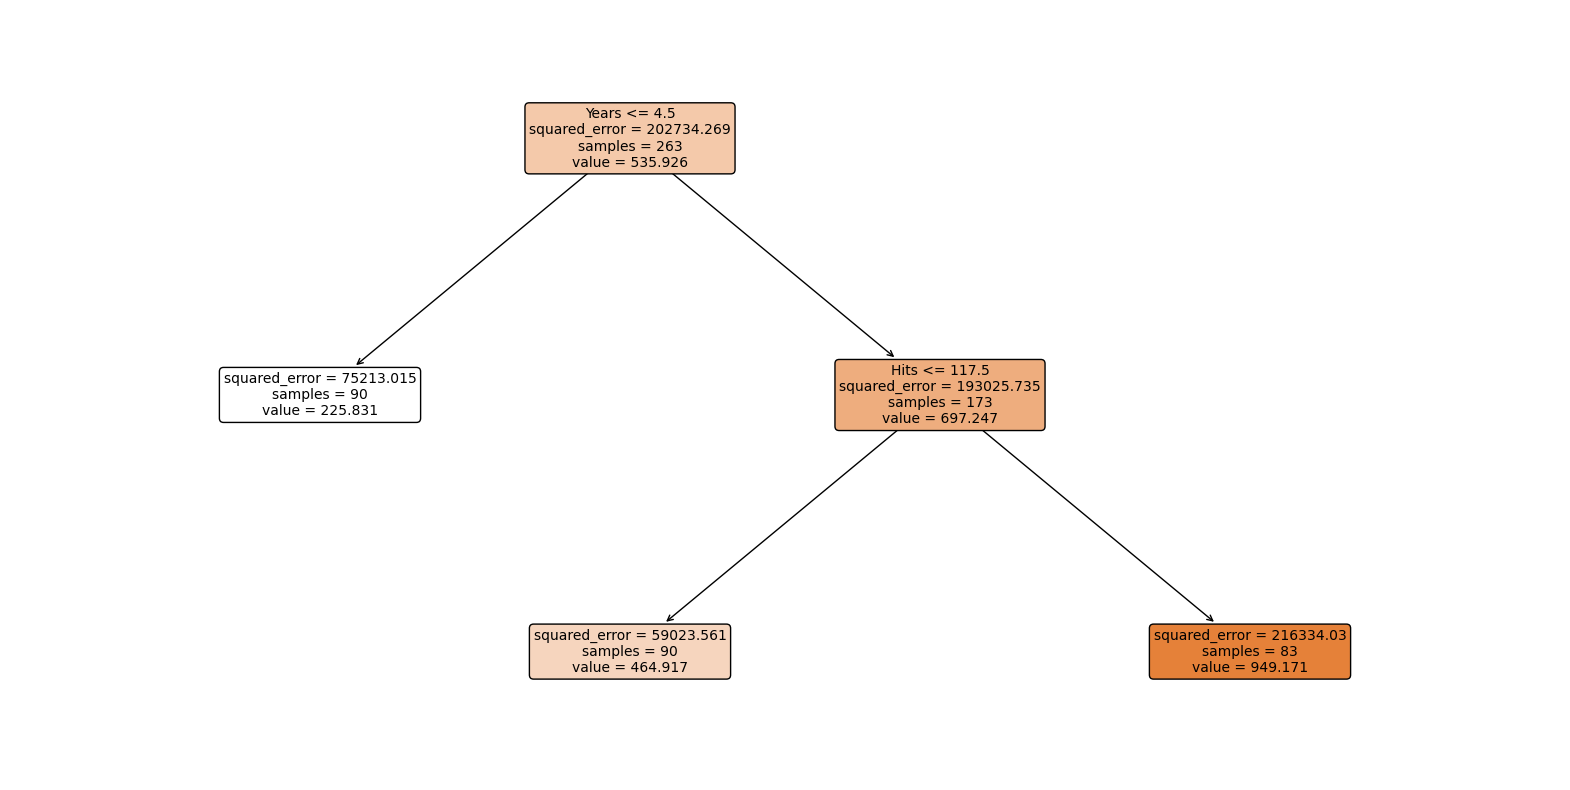

In [8]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10)) # Adjust the size to your preference
plot_tree(regressor,feature_names=X.columns.tolist(),filled=True,rounded=True, fontsize=10)

plt.show()

In [9]:
X

,Years,Hits
1,14,81
2,3,130
3,11,141
4,2,87
5,11,169
...,...,...
317,5,127
318,12,136
319,6,126
320,8,144


In [10]:
y

1       475.0
2       480.0
3       500.0
4        91.5
5       750.0
        ...  
317     700.0
318     875.0
319     385.0
320     960.0
321    1000.0
Name: Salary, Length: 263, dtype: float64

> Question: Describe the previous tree. What do you see? Do you think this will work well? Respond **briefly**
El primer corte del arbol separa en funcion de la variable years, si es menor o igual a 4,5 y el segundo corte en funcion d ela variable hits, si es menor o igual a 117,5 

Now we will plot the decision regions using the information on the cuts. Add lines wherever needed so that you can see the decision boundaries for the regression tree above

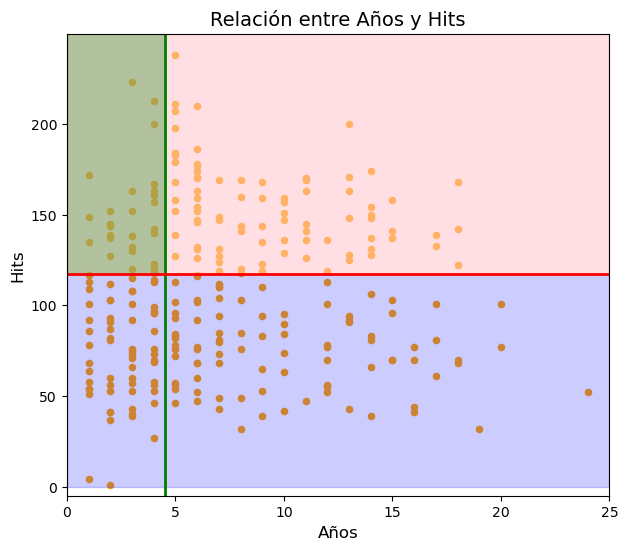

In [11]:
hitters.plot('Years', 'Hits', kind='scatter', color='orange', figsize=(7,6))
plt.xlim(0,25)
plt.ylim(ymin=-5)

# Add whatever you may need here to clearly plot the decision boundaries 
x_pos = 4.5 
y_pos = 117.5  
plt.axvline(x=x_pos, color='green', linestyle='-', linewidth=2)
plt.axhline(y=y_pos, color="red", linestyle='-', linewidth=2)

# Rellenar áreas según las líneas de decisión
x = np.linspace(0, 25, 100)
plt.fill_between(x, 0, y_pos, color='blue', alpha=0.2)  # Área inferior
plt.fill_between(x, y_pos, 250, color='pink', alpha=0.5)  # Área superior

# Llenar una región más específica (por ejemplo, entre 0 y 4.5 en X)
x3 = np.linspace(0, x_pos, 100)
plt.fill_between(x3, y_pos, 250, color='green', alpha=0.3)

# Títulos y etiquetas
plt.title('Relación entre Años y Hits', fontsize=14)
plt.xlabel('Años', fontsize=12)
plt.ylabel('Hits', fontsize=12)

# Mostrar el gráfico
plt.show()


## Tree Size

Now, for the previous part we limited the growth of the tree so that we recovered a simple (but easily interpretable) tree. Now we will go all-out: we will construct a more exhaustive tree using different variables. For this particular case, let us use **all variables except** `League`, `Division`, `NewLeague` and `Salary` as independent variables to predict, precisely, the `Salary` value. 

In [12]:
# Construct the input variable dataset


# Print the column names to check
columns = []
for column in hitters.columns:
    if column != "League" and column != "Division" and column != "NewLeague" and column != "Salary" and column != "Player":
        columns.append(column)

X = hitters[columns]
y = hitters["Salary"]

# Print the column names to check
print(X.columns)


Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors'],
      dtype='object')


We will now perform the train/test split, but we will do it so that the proportion of train and test examples is $50\%$ (that is, train and test consist on $50\%$ of the datapoints).

In [13]:
# Perform the train-test split here. Do it so that the  
x_train, x_test, y_train, y_test = train_test_split(X.fillna(X.mean()), y.fillna(y.mean()), test_size=0.5, random_state=0) # TODO: Fill the NAs,
#fixing also the random_state to 0 for reproducibility

Now, train the tree to its fullest extent: put no limits on the growth and see what happens. You can re-use some of the previous `graphviz` code to visualize the tree here. Plot the complete tree.

In [14]:
# Train the tree without limits to its growth (random_state = 0)
unlimited_tree_regressor = DecisionTreeRegressor(random_state=0) # TODO 
unlimited_tree_regressor.fit(x_train, y_train) # TODO

DecisionTreeRegressor(random_state=0)

Reuse the code you need to plot the tree here

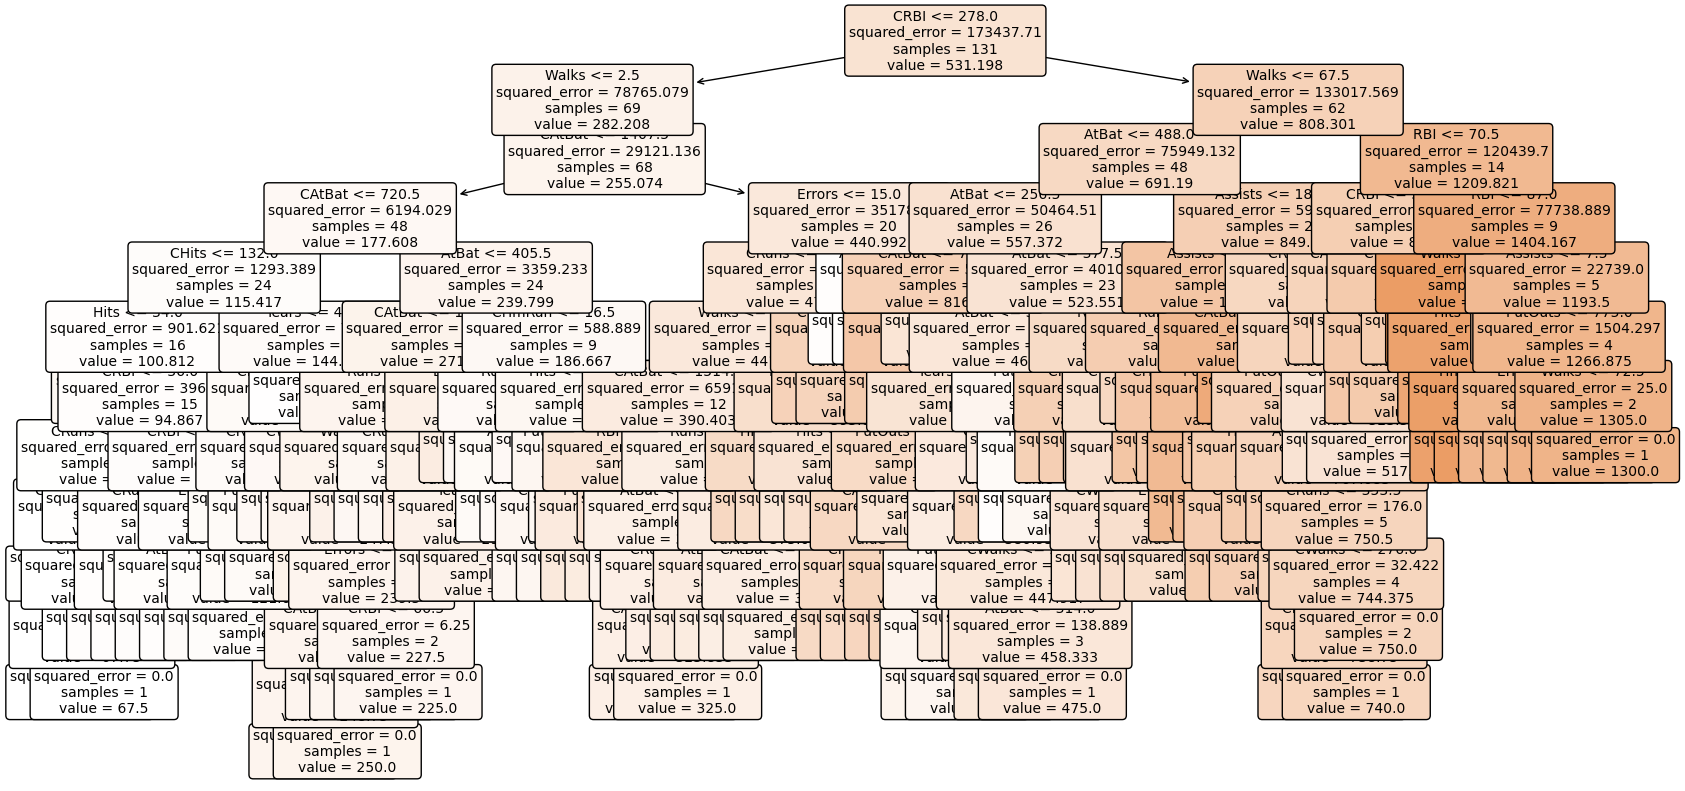

In [15]:
# TODO: Your code here!
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10)) # Adjust the size to your preference
plot_tree(unlimited_tree_regressor,feature_names=X.columns.tolist(),filled=True,rounded=True, fontsize=10)

plt.show()


> Question: What do you see? What can you say about this tree? Does it have any important properties?


Se trata de un arbol con mucho overfitting

Maybe we went _a bit too far_ with the tree... Let's set up some limitations to see everything better. Try setting the `max_features` to 9, and the `max_depth` to 4. (_It is important you understand what these parameters do! Check out the documentation in the [library](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)_)

In [16]:
regressor_2 =  DecisionTreeRegressor(max_features=9,max_depth=4,random_state = 0) 
regressor_2.fit(x_train, y_train) # TODO

DecisionTreeRegressor(max_depth=4, max_features=9, random_state=0)

Reuse the code you may need to plot the tree here

In [17]:
X.columns

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors'],
      dtype='object')

In [18]:
X

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,325,9,3
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,313,381,20
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,37,113,7
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,1314,131,12


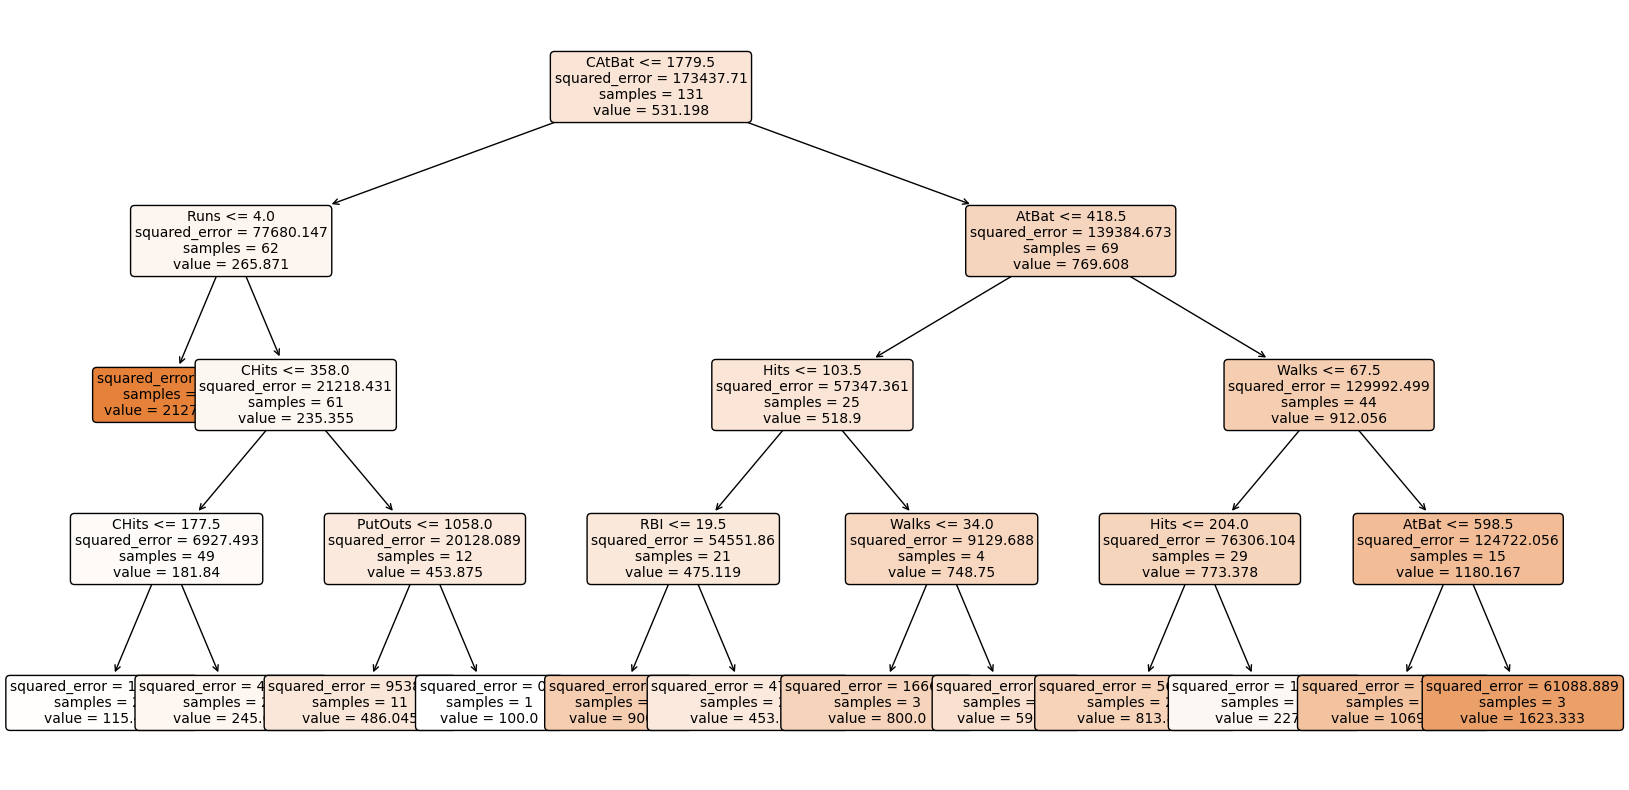

In [19]:
# TODO: Your code here!

plt.figure(figsize=(20,10)) # Adjust the size to your preference
plot_tree(regressor_2,feature_names=X.columns.to_list(),filled=True,rounded=True, fontsize=10)

plt.show()

Let us see if this tree works well at all... Since we are performing regression, we can obtain the RMSE (we use the Root MSE since it shares the same dimensions of the outputs):

In [20]:
predictions =  regressor_2.predict(x_test)# TODO: Obtain the predictions for x_test

# TODO: Print the RMSE for the predictions
rmse=np.sqrt(mean_squared_error(y_test, predictions))
rmse

369.8405919459622

Now, the question is: how do we know which tree depth to select here? As you may expect, the answer is, as almost always here, performing _cross validation_. In this particular instance we will not conduct exhaustive cross validation. Instead, we will do it in a very simple manner, obtaining *a single tree* for each depth value we want, fitting it to the data and seeing how well does it perform both in train and test  fitted to the data. To do this, do the following:
* Fit a **fixed max depth** (`i`) decision tree regressor using *all `x_train` variables*. Also, *fix the `random state` to 1* for reproducibility.
* Register its train and test RMSEs
* Plot the train and test RMSE curves for each `i` depth  

Make sure that you explore _enough_ depth values. 

Text(0, 0.5, 'Root Mean Squared Error')

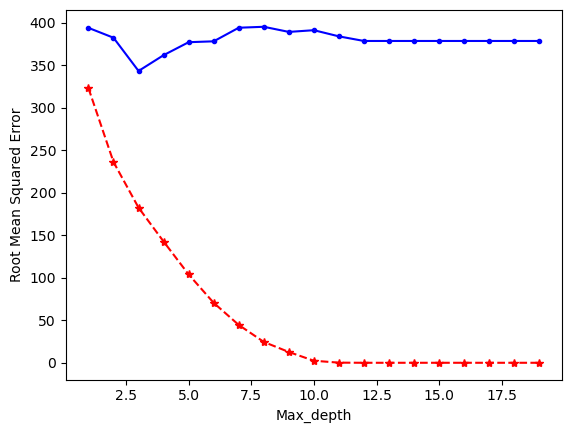

In [21]:
# Lists to store the results
train_rmse = []
test_rmse = []

# Range of depths to be explored
tree_size = np.arange(1,20)

for i in tree_size:
    regressor=DecisionTreeRegressor(max_depth=i,random_state=1)
    regressor.fit(x_train,y_train)

    train_prediction=regressor.predict(x_train)
    rsme_train=np.sqrt(mean_squared_error(y_train,train_prediction))
    train_rmse.append(rsme_train)


    pred_test = regressor.predict(x_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))
    test_rmse.append(rmse_test)


    # TODO: Train the needed tree with the set depth, then measure its RMSE in train and test and store them in the previous lists
    

# Plot the results
plt.plot(tree_size, train_rmse, 'r*--')
plt.plot(tree_size, test_rmse, 'b.-')
plt.xlabel('Max_depth')
plt.ylabel('Root Mean Squared Error')


> Question: What do you see here? What depth value would you select?

Vemos que le error de train va disminuyendo , pero el error de test alzanza el minimo en 3 y luego sube (overfir-tiing), eligiri el valor de profundidad de 3

Since we are not really making CV, we do not have multiple values for the train and test RMSE for each tree. Therefore, we *do not* have errorbars in the previous plot. That should raise some suspicions from your part. 

> Question: What happens if we change the `random_state` value? Are the previous results robust?

To answer the previous question you can try out code in the next cell. Feel free to try whatever you think is needed here.


Como se observa en el gráfico, el RMSE en el conjunto de prueba varía mucho según el valor de random_state, lo que indica que el modelo es sensible a la aleatoriedad en la partición de los datos. A partir de max_depth > 12, los valores de RMSE tienden a estabilizarse, lo que sugiere que las primeras divisiones del árbol tienen un impacto significativo en el rendimiento del modelo. Si buscamos una profundidad más robusta, deberíamos optar por aquella que minimice el RMSE de manera consistente, evitando un ajuste excesivo a una única configuración de los datos.

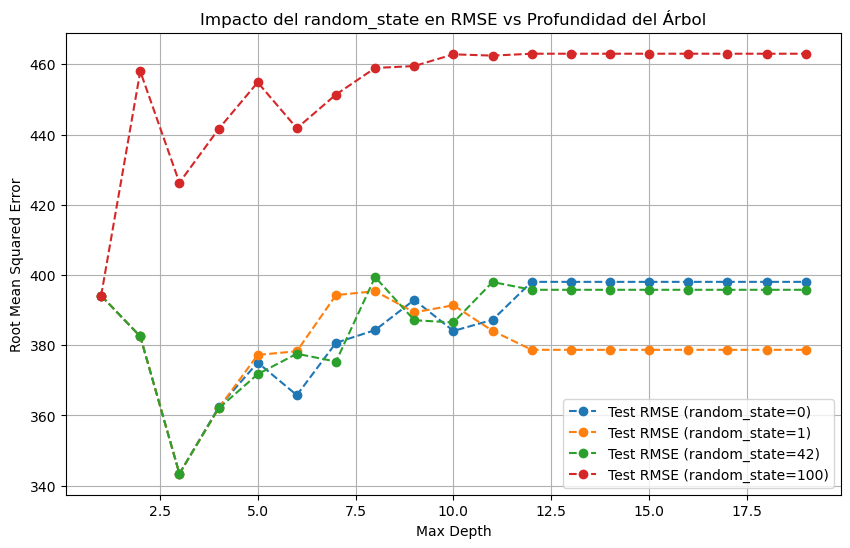

In [22]:


random_states = [0, 1, 42, 100]
train_rmse_results, test_rmse_results = [], []

#profundidades a evaluar
max_depth_values = np.arange(1, 20)

for rs in random_states:
    train_rmse, test_rmse = [], []

    for depth in max_depth_values:
        regressor = DecisionTreeRegressor(max_depth=depth, random_state=rs)
        regressor.fit(x_train, y_train)

        #predicciones y cálculo de RMSE
        train_rmse.append(np.sqrt(mean_squared_error(y_train, regressor.predict(x_train))))
        test_rmse.append(np.sqrt(mean_squared_error(y_test, regressor.predict(x_test))))

    train_rmse_results.append(train_rmse)
    test_rmse_results.append(test_rmse)


plt.figure(figsize=(10, 6))

for rs, test_rmse in zip(random_states, test_rmse_results):
    plt.plot(max_depth_values, test_rmse, marker='o', linestyle="--", label=f"Test RMSE (random_state={rs})")

plt.xlabel('Max Depth')
plt.ylabel('Root Mean Squared Error')
plt.legend()
plt.title('Impacto del random_state en RMSE vs Profundidad del Árbol')
plt.grid(True)
plt.show()



In order to get more acquainted with the results, check out what happens if you include less  `x_train` features. To do so, change what you need from the previous block of code and put it in the next block here.
> Question: Do you see any important changes? How do you explain this?  

El error cambia muhco si cambiamos el numero maximo de fetures, ya quee al eliminar variables que podrian ser importantes  es posible que se excluyan características relevantes, lo que reduce la capacidad del modelo para capturar patrones importantes en los datos y, en consecuencia, disminuye la precisión de sus predicciones
Si se eligen valores bajos de max_features, el modelo utiliza menos características para dividir en cada nodo, lo que puede ayudar a reducir el sobreajuste. Sin embargo, esto también puede impedir que el árbol capture relaciones importantes entre las variables, como se observa con max_features = 2, donde la variabilidad del error es considerablemente alta. Por otro lado, valores más altos pueden permitir un modelo más detallado, pero con mayor varianza. En este caso, max_features = 6 parece ofrecer un buen equilibrio: logra mayor estabilidad en las predicciones sin evidenciar un sobreajuste claro, lo que lo posiciona como una opción potencialmente óptima

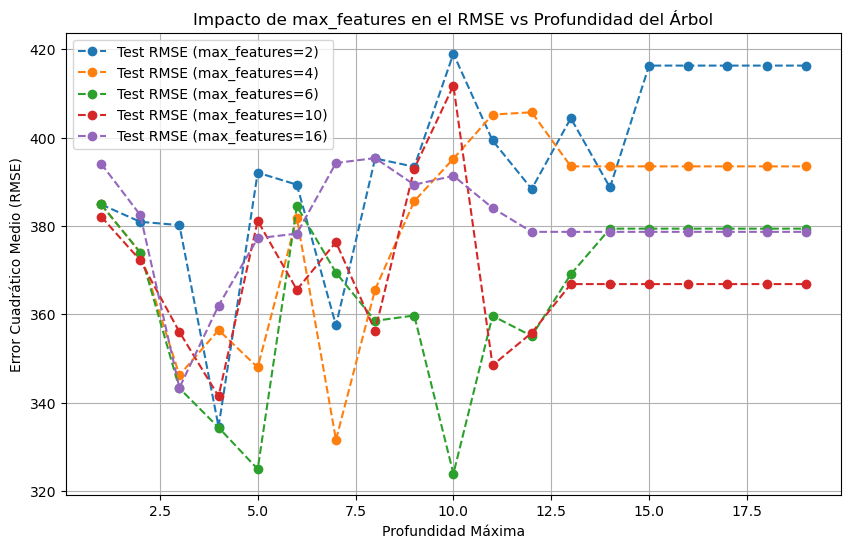

In [23]:
# TODO: Your code here!
max_features_values = [2, 4, 6, 10, 16]  

# Rango de profundidades a analizar
max_depth_values = np.arange(1, 20)

plt.figure(figsize=(10, 6))

for max_feat in max_features_values:
    train_rmse, test_rmse = [], []

    for depth in max_depth_values:
        regressor = DecisionTreeRegressor(max_depth=depth, max_features=max_feat, random_state=1)
        regressor.fit(x_train, y_train)

        # Predicciones y cálculo de RMSE
        train_rmse.append(np.sqrt(mean_squared_error(y_train, regressor.predict(x_train))))
        test_rmse.append(np.sqrt(mean_squared_error(y_test, regressor.predict(x_test))))

    # Graficar los resultados
    plt.plot(max_depth_values, test_rmse, marker='o', linestyle="--", label=f"Test RMSE (max_features={max_feat})")
    
plt.xlabel('Profundidad Máxima')
plt.ylabel('Error Cuadrático Medio (RMSE)')
plt.legend()
plt.title('Impacto de max_features en el RMSE vs Profundidad del Árbol')
plt.grid(True)
plt.show()

## Classification Tree

In order to complete this practical exercises with trees, we will also try out some classification trees to later do ensembles. Let us see how this works. 

First, load the `Carseat.csv` dataset from `data` (make sure to remove the NAs, as before)

In [24]:
# Load the dataset (remove the NAs)
carseats = pd.read_csv("../data/Carseat.csv").dropna()
carseats

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


Make it so that we have a new binary variable called `high`. This variable should be `1` when `sales` are over 8, and `0` otherwise.

In [25]:
carseats['high'] = [1 if row["Sales"] > 8 else 0 for i, row in carseats.iterrows()]# TODO

Convert the remaining variables to make them usable here

The variables `ShelveLoc`, `Urban` and `US` need to be converted to categorical variables to be correctly used. To that end, I suggest you use `pd.factorize` (although feel free to do as you will here...)

In [29]:
# TODO: Your code here!

categorical_cols = ['ShelveLoc', 'Urban', 'US']

for col in categorical_cols:
    carseats[col], _ = pd.factorize(carseats[col])
    print(carseats[col])

0      0
1      1
2      2
3      2
4      0
      ..
395    1
396    2
397    2
398    0
399    1
Name: ShelveLoc, Length: 400, dtype: int64
0      0
1      0
2      0
3      0
4      0
      ..
395    0
396    1
397    0
398    0
399    0
Name: Urban, Length: 400, dtype: int64
0      0
1      0
2      0
3      0
4      1
      ..
395    0
396    0
397    0
398    0
399    0
Name: US, Length: 400, dtype: int64


In [30]:
carseats

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,high
0,9.50,138,73,11,276,120,0,42,17,0,0,1
1,11.22,111,48,16,260,83,1,65,10,0,0,1
2,10.06,113,35,10,269,80,2,59,12,0,0,1
3,7.40,117,100,4,466,97,2,55,14,0,0,0
4,4.15,141,64,3,340,128,0,38,13,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,0,0,1
396,6.14,139,23,3,37,120,2,55,11,1,0,0
397,7.41,162,26,12,368,159,2,40,18,0,0,0
398,5.94,100,79,7,284,95,0,50,12,0,0,0


Now, we will employ all variables to predict the `high` value (except `Sales` and `high`, for obvious reasons). Note that we have essentially converted a _regression_ problem into a _binary classification_ one.

In [31]:
X =  carseats.drop(columns=["Sales","high"])# Drop the unwanted columns
y =  carseats["high"]  #Select the "high" column

# TODO: Performn the train/test split with again 50% data for train and 50% for test 
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.5, random_state = 0)

Construct a decision tree classifier. To control for the depth, we will fix it to a *maximum depth of 6*. Use as impurity criteria the **Gini index**.

In [33]:
carseats_classifier = DecisionTreeClassifier(criterion="gini", max_depth=6)  # TODO: Fill the NAs. Fix the random_state to 0

# Train the model with .fit
carseats_classifier.fit(X_train, y_train) # TODO

DecisionTreeClassifier(max_depth=6)

Plot the tree (again, reuse whatever you may need here)

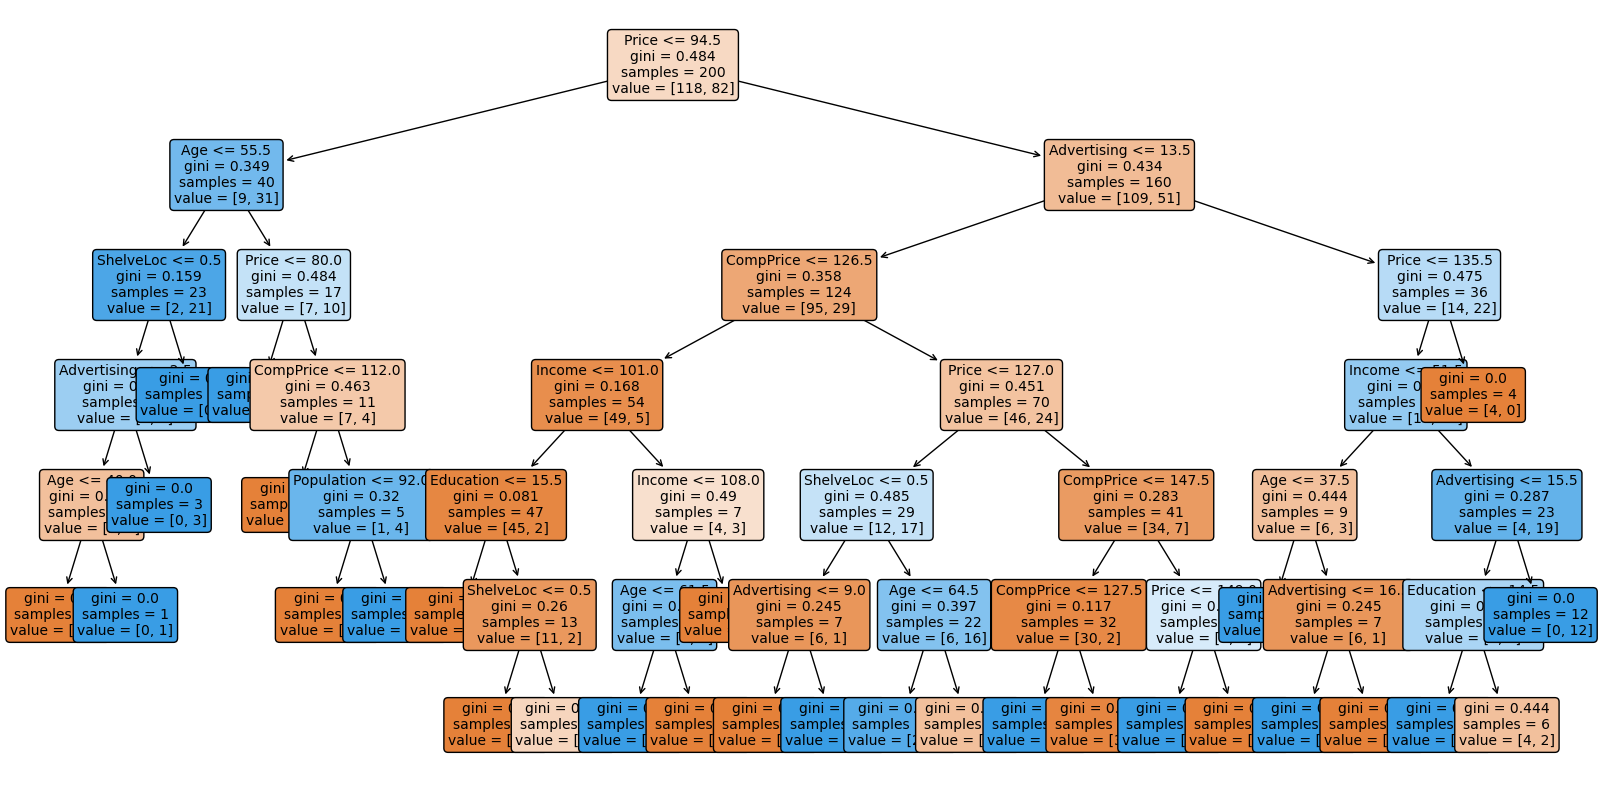

In [34]:
# TODO: Your code here!
# TODO: Your code here!
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10)) # Adjust the size to your preference
plot_tree(carseats_classifier,feature_names=X.columns.tolist(),filled=True,rounded=True, fontsize=10)

plt.show()

Let us now assess the quality of the tree. To that end, **represent the confusion matrix** for the test data

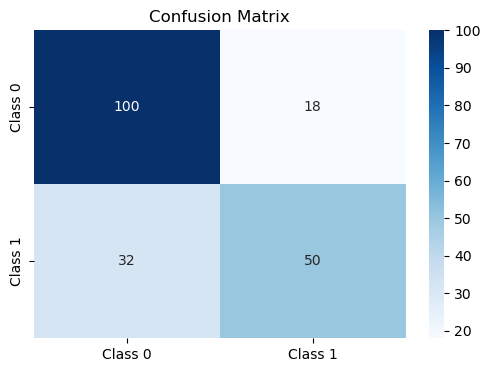

In [36]:
# TODO: Your code here!
import seaborn as sns
cm = confusion_matrix(y_test,carseats_classifier.predict(X_test))

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.show()

> Questions: 
> * What is the **precision** of this tree?
La precision es TP/TP+FP = 100/100+32 = 0.757
> * Do you consider the dataset balanced?
No parece muy balanecado ya que las muestras psoitivas son muchas mas que las negativas




# Ensembles

Now we will try out some of the ensemble methods from class. Remember there is an stochastic component embedded in these for the most part, so we may not recover exactly the same results twice depending on how you implement things.

## Bagging

The decision tree models mentioned above usually suffers from high variance. **B**ootstrap **agg**regation, or **bagging** usually helps with this issue. To do bagging here, we will do it both by hand and by employing the sklearn function.

First, let's go with the *by-hand* implementation

In [40]:
# Set the bagging parameters
n_estimators = 10  # Number of decision trees in the ensemble
max_samples = 0.8  # Proportion of samples to be used for each bootstrap sample


n_samples = X_train.shape[0]
bootstrap_size = int(max_samples * n_samples)
# Store the predictions
predictions = []

for _ in range(n_estimators):

    # Create a bootstrap sample
    sample_indices = np.random.choice(n_samples, bootstrap_size, replace=True)
    X_bootstrap = X_train.iloc[sample_indices]
    y_bootstrap = y_train.iloc[sample_indices]
    
    # Train a decision tree classifier on the bootstrap sample
    decision_tree = DecisionTreeClassifier()  # No restrictions
    decision_tree.fit(X_bootstrap, y_bootstrap)
    # Make predictions on the test set using the trained decision tree
    y_pred = decision_tree.predict(X_test)# TODO: Obtain the predictions for X_test
    predictions.append(y_pred)

# Convert predictions list to a NumPy array
predictions = np.array(predictions)

# Combine predictions using majority voting (for classification)
majority_vote = mode(predictions, axis=0).mode[0]

# If this were regression, you would use averaging instead:
# combined_predictions = np.mean(predictions, axis=0)



C:\Users\lucia\AppData\Local\Temp\ipykernel_27384\848544266.py:29: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  majority_vote = mode(predictions, axis=0).mode[0]


Print the confusion matrix

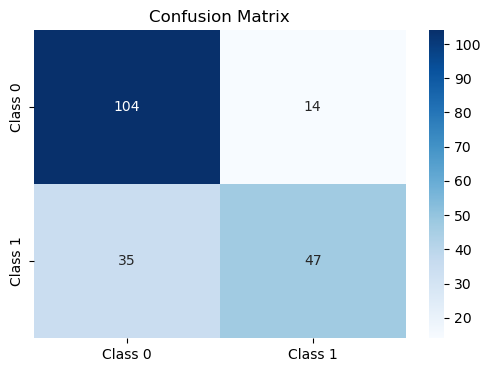

In [41]:
# TODO: Your code here! Use majority_vote and y_test
cm = confusion_matrix(y_test,majority_vote)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.show()

Let's see how this is done in `sklearn`... Fit it and show the confusion matrix

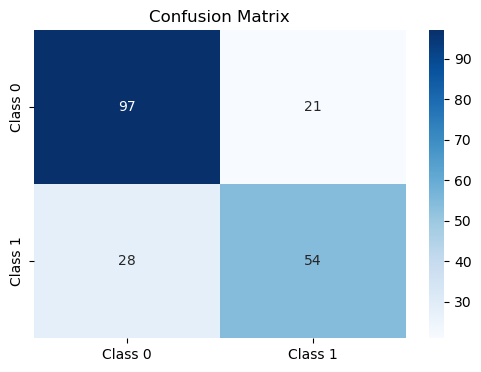

In [43]:
# Create a BaggingClassifier (fix random_state to 0)
bagging = BaggingClassifier(random_state=0)

# TODO: Train it with the training data
bagging.fit(X_train, y_train)

# TODO: Obtain the predictions
bagging_pred = bagging.predict(X_test)

# TODO: Print the confusion matrix (use the confusion_matrix function)
cm = confusion_matrix(y_test,bagging_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.show()

We will use the `sklearn` implementation to study the variable importance. *Make sure you understand how this is done!*

<Axes: >

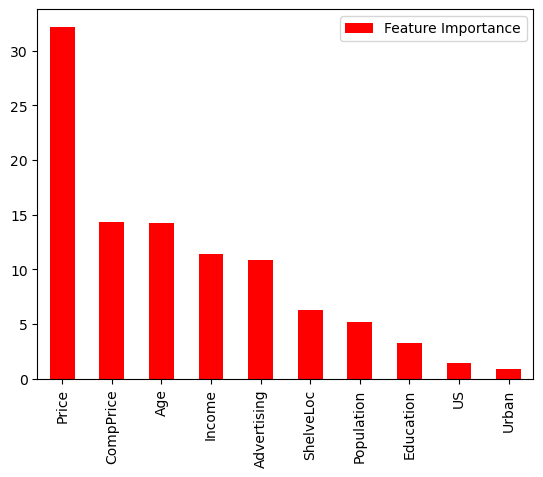

In [49]:
importancias = []
for tree in bagging.estimators_:
    importancias.append(tree.feature_importances_)
feature_importances = np.mean(importancias, axis=0)

bagging_featureImportance = pd.DataFrame({'Feature Importance': feature_importances * 100}, index=X.columns)
bagging_featureImportance.sort_values('Feature Importance', ascending=False).plot(kind='bar', color='red')

> Question: What do you see here?

Que la variable mas importante e sel precio

## Random Forest

We will also do this in the RF case. First, we will implement it by hand. Feel free to use the previous code and modify it as you may see fit to do RF here!

In [52]:

# RF parameters
n_estimators = 10  # Number of decision trees in the forest
max_features = 0.8  # Proportion of features to consider for each split

predictions = []
n_samples = X_train.shape[0]
n_features = X_train.shape[1]
n_selected_features = int(max_features * n_features) 

# Train decision trees with random feature selection and make predictions
predictions = []
for _ in range(n_estimators):
    # TODO: Construct your own RF ensemble! Reuse the Bagging code and change whatever you may need here

    #Creamos la muestra boostrap
    sample_indices = np.random.choice(n_samples, n_samples, replace=True)
    X_bootstrap = X_train.iloc[sample_indices]
    y_bootstrap = y_train.iloc[sample_indices]

    # Cogemos un subconjunto de dicha muestra (seleccionamos aleatoriamente las features)
    feature_indices = np.random.choice(n_features, n_selected_features, replace=False)
    X_bootstrap_subset = X_bootstrap.iloc[:, feature_indices]

    decision_tree = DecisionTreeClassifier()
    decision_tree.fit(X_bootstrap_subset, y_bootstrap)

    # Hacer predicciones en el test set (usando las mismas características seleccionadas)
    X_test_subset = X_test.iloc[:, feature_indices]
    y_pred = decision_tree.predict(X_test_subset)

    predictions.append(y_pred)

# Convertir las predicciones a un array
predictions = np.array(predictions)



# TODO: Finally, combine predictions using majority voting
majority_vote = mode(predictions, axis=0).mode[0]

C:\Users\lucia\AppData\Local\Temp\ipykernel_27384\2194441318.py:39: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  majority_vote = mode(predictions, axis=0).mode[0]


Print the confusion matrix

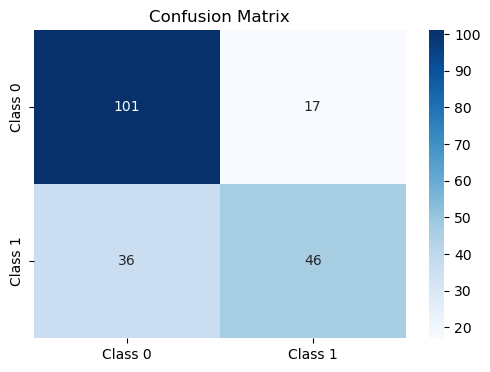

In [53]:
# TODO: Your code here!
cm = confusion_matrix(y_test,majority_vote)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.show()

Let us do it again with `sklearn` so you see the differences... Show the confusion matrix. In this last part there may be some differences with your run, which are due to the randomness of the classifiers constructed. Do not worry too much about it here.

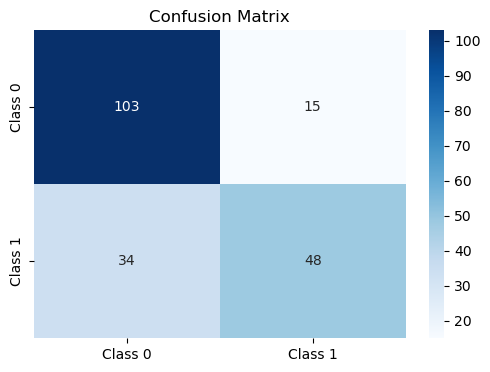

In [54]:
# TODO: Construct the RF classifier with RandomForestClassifier. Fix the random_state to 0, n_estimators to 10 and max_features to 0.8
rf = RandomForestClassifier(random_state=0,n_estimators=10,max_features=0.8)# TODO

# TODO: Train it
rf.fit(X_train, y_train)

# TODO: Predict the test values
rf_pred= rf.predict(X_test)

# TODO: Obtain the confusion matrix and print it
cm = confusion_matrix(y_test,rf_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.show()


Using again the `sklearn` implementation, we will study the feature importance

<Axes: >

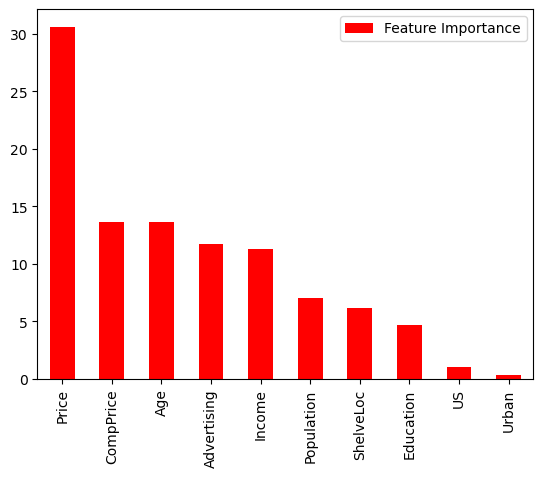

In [55]:
rf_featureImportance= pd.DataFrame({'Feature Importance':rf.feature_importances_*100}, index= X.columns)
rf_featureImportance.sort_values('Feature Importance', ascending=False).plot(kind='bar', color='red')

> Question: Given the models thus far (simple tree, bagging and RF), which one would you choose and why?  Random Forest porque  ofrece un buen equilibrio entre precisión, robustez y capacidad de interpretación, superando al árbol simple y a Bagging 



## Extra: Boosting

In order to fully complete our review of the ensemble methods from class, we are missing the **Boosting method**. In order to keep matters simple, we will implement it here with `sklearn` so that you get to see what it looks like...

In [56]:
# Import the model
from sklearn.ensemble import GradientBoostingClassifier

# Create the Boosting model
gb= GradientBoostingClassifier(n_estimators = 5000, random_state = 1, max_depth = 2)

# If you want to try it out, you can change reuse most of previous codes to run it here!

The results are pretty good! Keep in mind that this is achieved with super weak learners s.a. trees with depth 2. It is quite fast, and super easy to use with `sklearn`. We can also study the variable importance in this case.

<Axes: >

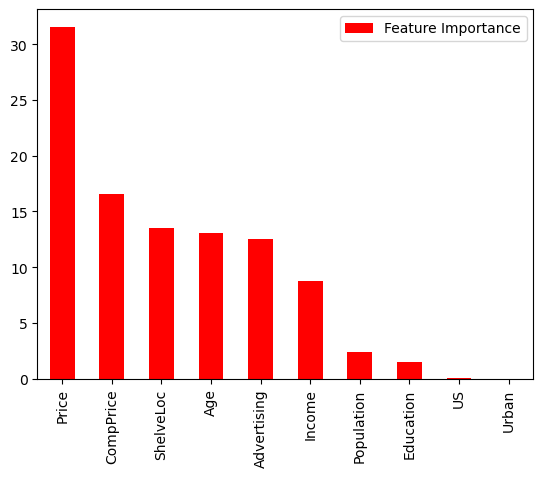

In [57]:
gb.fit(X_train,y_train)
gb_featureimportance= pd.DataFrame({'Feature Importance': gb.feature_importances_*100}, index= X.columns)
gb_featureimportance.sort_values('Feature Importance', ascending=False).plot(kind='bar', color='red')

If you want to see how this can be implemented easily by hand, you can use the following code. We are using an implementation that follows a description of Boosting mode similar to the one given in the ISLR book

In [ ]:
# Initialize the parameters
n_estimators = 1000  # Number of decision trees in the ensemble
learning_rate = 0.1  # Learning rate for each decision tree

# Initialize the weights for the training samples
sample_weights = np.ones(len(X_train)) / len(X_train)

# Train decision trees with weighted samples and make predictions
predictions = []
for _ in range(n_estimators):

    # Train a decision tree classifier on the weighted training samples
    decision_tree = DecisionTreeClassifier(max_depth = 2)
    decision_tree.fit(X_train, y_train, sample_weight=sample_weights)

    # Make predictions on the test set using the trained decision tree
    y_pred = decision_tree.predict(X_test)
    predictions.append(y_pred)

    # Calculate error
    incorrect = (y_pred != y_test).astype(int)
    error = np.sum(sample_weights * incorrect) / np.sum(sample_weights)

    # Update sample weights
    alpha = learning_rate * np.log((1 - error) / error)
    sample_weights *= np.exp(alpha * incorrect)

# Combine predictions
# For classification, you can use weighted voting
combined_predictions = np.zeros(len(X_test))
for prediction in predictions:
    combined_predictions += prediction

# Evaluate the performance of the boosting ensemble
# TODO: This can be done with the previous codes you had already. Reuse them here to see the result!